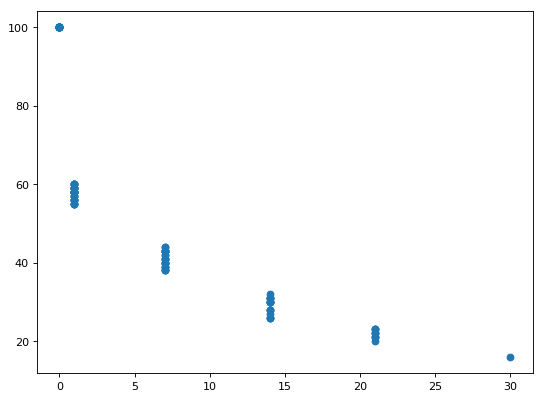

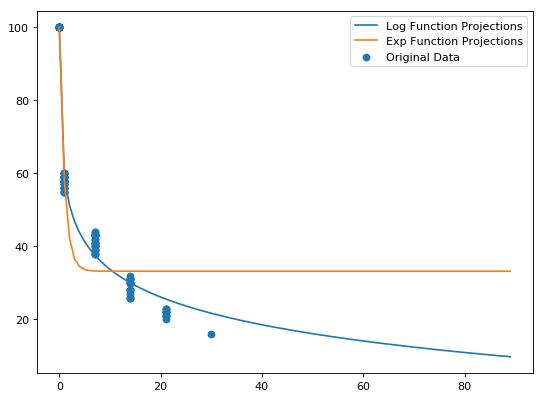

Log Function squared error: 190.8910903685942
Exponential Function squared error: 1076.8082060442562


In [121]:
import matplotlib.pyplot as plt
import random
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
warnings.filterwarnings('ignore')

def log_func( x, a, b, c ):
    return -a * np.log2( b + x ) + c

def exp_func( x, a, b, c ):
    return a * np.exp( -b * x ) + c

def sumSquaredError( projected_y, actual_y ):
    squared_error = sum( [ abs( actual_y[ x ][ i ] - projected_y[ x ] )**2 
               for x in range( len( projected_y ) )
               for i in range( len( actual_y ) )
    ] )
    return squared_error

underlying = [ ( 0, [ 100, 100 ] ), ( 1, [ 55, 60 ] ), ( 7, [ 38, 44 ] ), ( 14, [ 26, 32 ] ),
             ( 21, [ 20, 25 ] ), ( 30, [ 14, 18 ] ) ]
cohorts = 31
cohorts_retention_data = []

for i in range( cohorts ):
    for k in underlying:
        x = k[ 0 ]
        if i >= x:
            y = random.randint( k[ 1 ][ 0 ], k[ 1 ][ 1 ] )
            cohorts_retention_data.append( ( x, y ) )
    
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter( *zip( *cohorts_retention_data ) )

day_x = [ x[ 0 ] for x in cohorts_retention_data ]
day_x_counts = [ list( i ) for i in set( tuple( i ) for i in [ [ x, day_x.count( x ) ] for x in day_x ] ) ]
day_x_counts.sort( key=lambda x: x[ 0 ] )

projection_endpoint = 90 
#the day we want to project retention curve out to
max_cohort = max( [ x[ 0 ] for x in day_x_counts if x[ 1 ] >= 10 ] ) 
#get the max cohort X value with at least 10 data points

x_data = [ x[ 0 ] for x in cohorts_retention_data if x[ 0 ] <= max_cohort ]
#pull the x values out of the cohort_retention_data
y_data = [ x[ 1 ] for x in cohorts_retention_data if x[ 0 ] <= max_cohort ]
#pull the y values out of the cohort_retention_data

#note that the x and y data above isn't sorted, but each value in one list corresponds to the value #in the other list. This means we can't sort one list and not the other: the value of x_data[ z ] 
#matches the value of y_data[ z ].

log_popt, log_pcov = curve_fit( log_func, x_data, y_data )
#get the log function parameters using curve_fit on the x and y data
exp_popt, exp_pcov = curve_fit( exp_func, x_data, y_data )
#get the exp function parameters using curve_fit on the x and y data

log_y_projected = log_func( np.arange( projection_endpoint ), *log_popt )
#project out the values to the projection_endpoint using the log function parameters
exp_y_projected = exp_func( np.arange( projection_endpoint ), *exp_popt )
#project out the values to the projection_endpoint using the exp function parameters

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter( *zip( *cohorts_retention_data ), label="Original Data" )
plt.plot( log_y_projected, label="Log Function Projections" )
plt.plot( exp_y_projected, label="Exp Function Projections" )
plt.legend()
plt.show()

#print( list( set( x_data ) ) )
log_ss_y_values = [ log_y_projected[ i ] for i in list( set( x_data ) ) ]
exp_ss_y_values = [ exp_y_projected[ i ] for i in list( set( x_data ) ) ]
actual_y_values = [ [] for i in range( len( list( set( x_data ) ) ) ) ]

for z in [ i for i in cohorts_retention_data if i[ 0 ] in list( set( x_data ) ) ]:
    this_index = list( set( x_data ) ).index( z[ 0 ] )
    actual_y_values[ this_index ].append( z[ 1 ] )

log_ss = sumSquaredError( log_ss_y_values, actual_y_values )
exp_ss = sumSquaredError( exp_ss_y_values, actual_y_values )

print( "Log Function squared error: " + str( log_ss ) )
print( "Exponential Function squared error: " + str( exp_ss ) )
